# 07_firm_growth_turnover_consecutive19-11

In [1]:
import pandas as pd
import numpy as np
import fs_qe as fq

%matplotlib inline

In [2]:
%%time
df_us = pd.read_csv('data/US_turnover.csv')
df_us = df_us[['id', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']].set_index('id')
df_us

CPU times: user 46.1 ms, sys: 13.1 ms, total: 59.2 ms
Wall time: 58.2 ms


,2011,2012,2013,2014,2015,2016,2017,2018,2019
id,,,,,,,,,
1.0,4.465090e+08,4.686510e+08,4.762940e+08,4.856510e+08,4.821300e+08,4.858730e+08,5.003430e+08,5.144050e+08,5.239640e+08
2.0,4.807700e+07,6.109300e+07,7.445200e+07,8.898800e+07,1.070060e+08,1.359870e+08,1.778660e+08,2.328870e+08,2.805220e+08
3.0,1.082490e+08,1.565080e+08,1.709100e+08,1.827950e+08,2.337150e+08,2.156390e+08,2.292340e+08,2.655950e+08,2.601740e+08
4.0,1.070800e+08,1.231200e+08,1.267610e+08,1.393670e+08,1.532900e+08,1.775460e+08,1.847860e+08,1.945790e+08,2.567760e+08
5.0,4.670290e+08,4.515090e+08,4.208360e+08,3.941050e+08,2.398540e+08,2.006280e+08,2.371620e+08,2.793320e+08,2.555830e+08
...,...,...,...,...,...,...,...,...,...
19816.0,0.000000e+00,0.000000e+00,2.102016e+06,1.470036e+05,4.166009e+04,1.453140e+03,3.372913e+04,-1.629530e+03,-1.510482e+04
19817.0,1.999184e+05,2.206320e+05,2.247263e+05,2.111582e+05,2.175781e+05,2.179777e+05,7.048170e+04,4.010596e+04,-1.615162e+04
19818.0,6.644995e+05,6.486813e+05,6.738931e+05,7.377048e+05,6.975915e+05,7.426194e+05,7.377128e+05,4.935553e+05,-1.723267e+04


In [3]:
df_us5 = fq.preprocess_data(df_us, var1='turnover', var2='logturnover')

/Users/shuhu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
/Users/shuhu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/shuhu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/shuhu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [4]:
df_us6 = df_us5[df_us5['fgrow_log'] != 0.0]
df_us7 = df_us6[df_us6['fgrow_log'] != np.inf]
df_us8 = df_us7[df_us7['fgrow_log'] != - np.inf]
df_us9 = df_us8[df_us8['turnover'] != 0.0]
df_us10 = df_us9[df_us9['logturnover'] > 0.0]
df_us10.to_csv('data/US_revenue.csv')

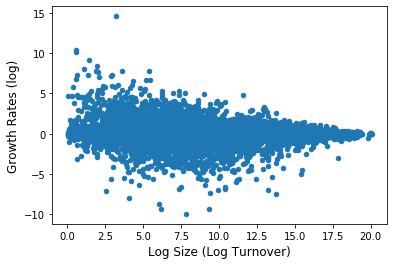

In [5]:
fq.scatterplot(df_us10, x='logturnover', y='fgrow_log', xlabel='Log Size (Log Turnover)')